source: https://www.youtube.com/watch?v=Kc6Jsph1kyM

# Regularization and Standardization

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline

In [3]:
true_feet = np.random.normal(4, size = 1000)
category = true_feet > 5
df = pd.DataFrame({
    'x1': true_feet + np.random.normal(size = len(true_feet)),
    'x2': true_feet + np.random.normal(size = len(true_feet)),
    'x3': true_feet + np.random.normal(size = len(true_feet)),
    'y': category
})

train, test = df.iloc[:500].copy(), df.iloc[500:].copy()

In [5]:
train.head()

,x1,x2,x3,y
0,4.877673,5.106530,4.013049,False
1,3.843805,2.942174,1.661732,False
2,7.000882,6.344301,4.744567,True
3,5.037521,3.677396,4.919399,False
4,3.401168,2.177732,1.628488,False


In [6]:
train[train['y']]

,x1,x2,x3,y
2,7.000882,6.344301,4.744567,True
8,3.760229,3.937783,6.731913,True
12,7.528421,5.040452,6.310083,True
16,4.488683,6.841637,4.633350,True
25,5.800157,4.645104,6.022055,True
...,...,...,...,...
444,6.979177,6.018636,5.159072,True
451,4.028689,5.373773,4.784407,True
457,4.983191,5.209033,5.682920,True
463,5.237195,3.584048,6.235499,True


In [8]:
xcols = ['x1', 'x2', 'x3']
model = LogisticRegression()
model.fit(train[xcols], train['y'])

LogisticRegression()

In [9]:
model.score(test[xcols], test['y'])

0.906

In [12]:
test['y'].value_counts()/ len(test)*100

y
False    84.0
True     16.0
Name: count, dtype: float64

In [13]:
model.coef_

array([[1.08527687, 0.9463461 , 0.8407277 ]])

<Axes: >

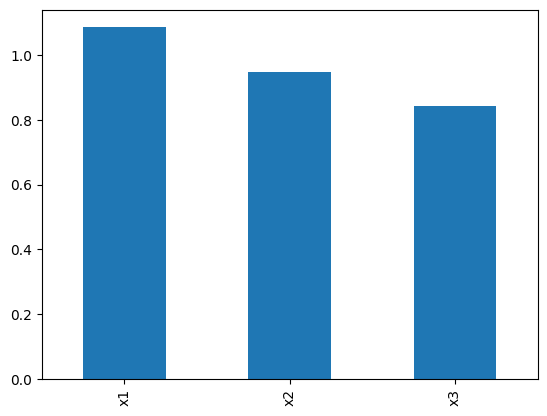

In [14]:
pd.Series(model.coef_.reshape(-1), index=xcols).plot.bar()

In [15]:
model.intercept_

array([-15.48860101])

In [22]:
true_feet = np.random.normal(4, size = 1000)
category = true_feet > 5
df = pd.DataFrame({
    'x1': true_feet + np.random.normal(size = len(true_feet)),
    'x2': (true_feet + np.random.normal(size = len(true_feet))) / 5280,  # feet to miles 
    'x3': true_feet + np.random.normal(size = len(true_feet)),
    'y': category
})

train, test = df.iloc[:500].copy(), df.iloc[500:].copy()

In [23]:
train.head()

,x1,x2,x3,y
0,1.413390,0.000350,0.406623,False
1,4.566551,0.000571,7.200722,False
2,1.442632,0.000142,1.751717,False
3,6.253439,0.001082,3.581290,False
4,3.039206,0.001087,3.037550,False


In [24]:
xcols = ['x1', 'x2', 'x3']
model = LogisticRegression()
model.fit(train[xcols], train['y'])

LogisticRegression()

<Axes: >

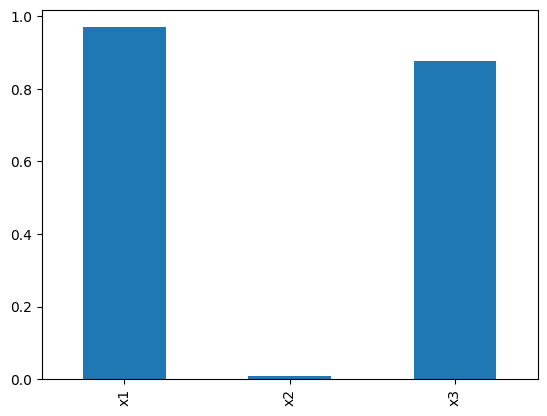

In [25]:
pd.Series(model.coef_.reshape(-1), index=xcols).plot.bar()

In [26]:
X = train.loc[:, 'x1':'x3']
X - X.mean()

,x1,x2,x3
0,-2.519628,-0.000410,-3.632467
1,0.633533,-0.000189,3.161632
2,-2.490386,-0.000618,-2.287373
3,2.320421,0.000322,-0.457800
4,-0.893812,0.000327,-1.001540
...,...,...,...
495,-0.070712,0.000083,0.317605
496,-2.487791,-0.000136,-1.145407
497,-0.309484,-0.000093,-1.279758
498,-1.823121,-0.000262,-0.251403


In [27]:
X.std()

x1    1.427494
x2    0.000277
x3    1.458586
dtype: float64

In [29]:
(X - X.mean())/ X.std()

,x1,x2,x3
0,-1.765071,-1.480535,-2.490403
1,0.443808,-0.680678,2.167600
2,-1.744586,-2.230162,-1.568212
3,1.625521,1.161119,-0.313865
4,-0.626141,1.180349,-0.686651
...,...,...,...
495,-0.049536,0.300126,0.217749
496,-1.742769,-0.491895,-0.785286
497,-0.216802,-0.334670,-0.877396
498,-1.277148,-0.946617,-0.172361


In [30]:
xcols = ['x1', 'x2', 'x3']
model = LogisticRegression()
model.fit(X[xcols], train['y'])

LogisticRegression()

In [35]:
test[xcols]

,x1,x2,x3
500,2.587808,0.000808,2.454910
501,5.269493,0.000794,4.858625
502,4.350515,0.000551,3.591576
503,4.057527,0.001125,3.734312
504,4.282669,0.001400,6.674319
...,...,...,...
995,3.766473,0.000783,3.895878
996,4.702820,0.000789,5.757476
997,5.434676,0.001039,3.107882
998,1.432983,0.000518,1.829717


In [31]:
model.score(test[xcols], test['y'])

0.856

# Linear vs. Ridge vs. Lasso

source: https://www.youtube.com/watch?v=V-Ov_QLcIvg

In [40]:
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [47]:
data_url = 'https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/office.csv'

In [48]:
office = pd.read_csv(data_url)
office.head()


,season,episode,episode_name,andy,angela,darryl,dwight,jim,kelly,kevin,...,mindy_kaling,paul_feig,gene_stupnitsky,lee_eisenberg,jennifer_celotta,randall_einhorn,brent_forrester,jeffrey_blitz,justin_spitzer,imdb_rating
0,1,1,pilot,0,1,0,29,36,0,1,...,0,0,0,0,0,0,0,0,0,7.6
1,1,2,diversity day,0,4,0,17,25,2,8,...,0,0,0,0,0,0,0,0,0,8.3
2,1,3,health care,0,5,0,62,42,0,6,...,0,0,0,0,0,0,0,0,0,7.9
3,1,5,basketball,0,3,15,25,21,0,1,...,0,0,0,0,0,0,0,0,0,8.4
4,1,6,hot girl,0,3,0,28,55,0,5,...,1,0,0,0,0,0,0,0,0,7.8


In [49]:
data_url = 'https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/office_long.csv'

In [50]:
office_long = pd.read_csv(data_url)
office_long.head()


,season,episode,episode_name,ken_kwapis,greg_daniels,b_j_novak,paul_lieberstein,mindy_kaling,paul_feig,gene_stupnitsky,lee_eisenberg,jennifer_celotta,randall_einhorn,brent_forrester,jeffrey_blitz,justin_spitzer,imdb_rating,name,value
0,1,1,pilot,1,1,0,0,0,0,0,0,0,0,0,0,0,7.6,andy,0
1,1,1,pilot,1,1,0,0,0,0,0,0,0,0,0,0,0,7.6,angela,1
2,1,1,pilot,1,1,0,0,0,0,0,0,0,0,0,0,0,7.6,darryl,0
3,1,1,pilot,1,1,0,0,0,0,0,0,0,0,0,0,0,7.6,dwight,29
4,1,1,pilot,1,1,0,0,0,0,0,0,0,0,0,0,0,7.6,jim,36


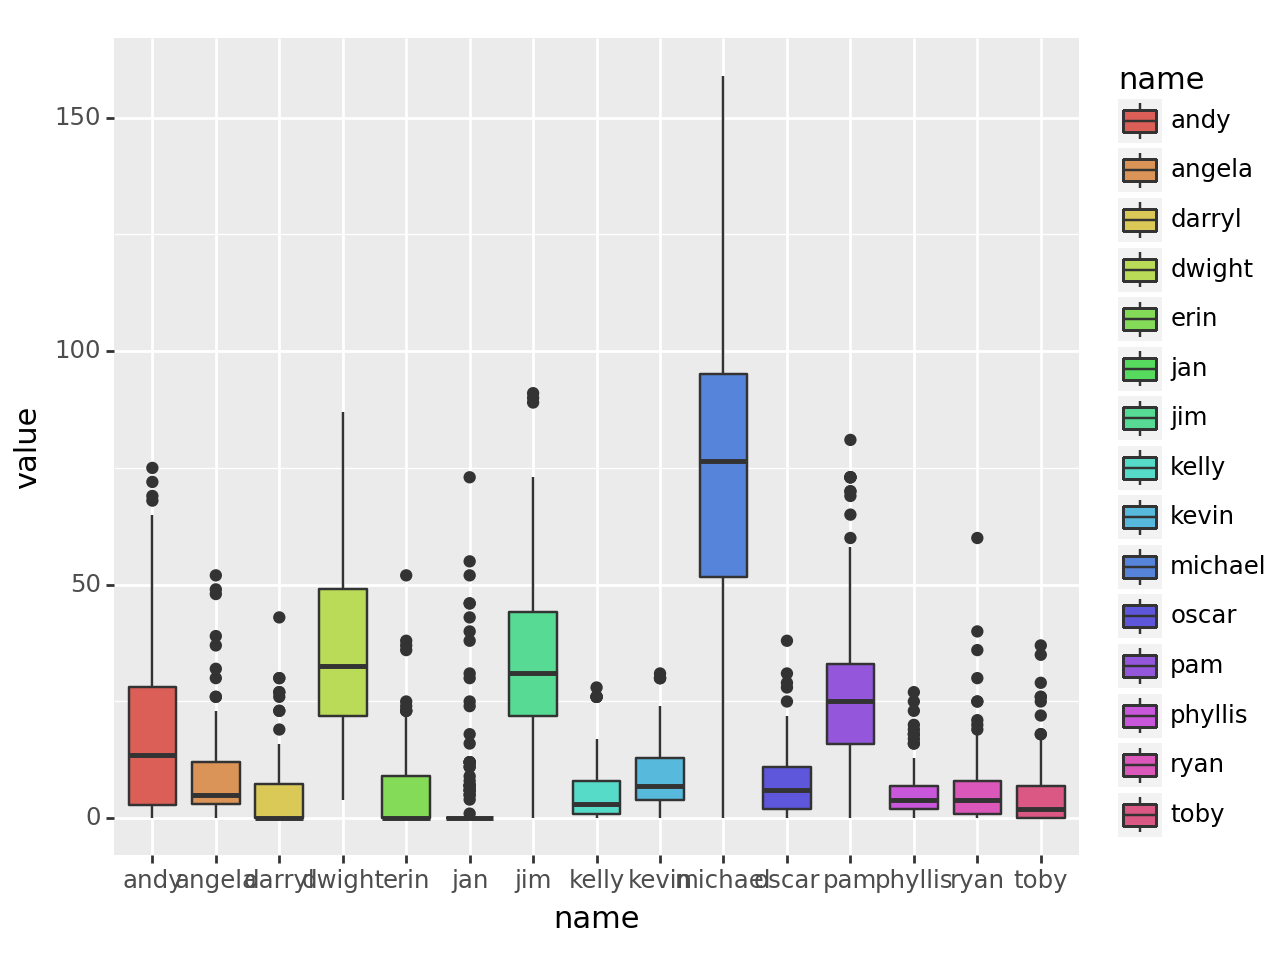

<Figure Size: (640 x 480)>

In [52]:
(ggplot(office_long, 
        aes(x='name', y='value', fill = 'name')) + 
         geom_boxplot())

In [53]:
feat = office.columns[3:31]

X = office[feat]
y = office['imdb_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

z = StandardScaler()

X_train[feat] = z.fit_transform(X_train[feat])
X_test[feat] = z.transform(X_test[feat])

X_train.head()

,andy,angela,darryl,dwight,jim,kelly,kevin,michael,oscar,pam,...,paul_lieberstein,mindy_kaling,paul_feig,gene_stupnitsky,lee_eisenberg,jennifer_celotta,randall_einhorn,brent_forrester,jeffrey_blitz,justin_spitzer
15,-1.034665,-0.423714,-0.618726,0.011625,0.771404,-0.076392,-0.150082,0.577260,0.136740,-0.051358,...,-0.369922,-0.505781,-0.336752,2.703274,2.703274,-0.301511,-0.353553,-0.385922,-0.263262,-0.282843
126,1.867061,-0.233042,-0.009032,-1.139227,-0.885209,1.217772,-0.002729,-1.775347,-0.131768,0.058476,...,-0.369922,-0.505781,-0.336752,-0.369922,-0.369922,-0.301511,-0.353553,-0.385922,-0.263262,3.535534
85,0.772070,0.243635,-0.618726,2.417951,1.092039,-0.399932,3.091696,1.523417,0.136740,2.310071,...,-0.369922,1.977142,2.969542,-0.369922,-0.369922,-0.301511,-0.353553,-0.385922,-0.263262,-0.282843
109,-0.268171,-0.805056,0.356784,-0.616112,-0.190501,0.570690,-0.297436,-0.701331,0.539502,0.442895,...,-0.369922,-0.505781,-0.336752,-0.369922,-0.369922,-0.301511,-0.353553,2.591194,-0.263262,-0.282843
11,-1.034665,-0.900391,-0.618726,-0.825358,0.237012,-0.723473,-1.181557,0.091396,-0.534530,0.223227,...,2.703274,-0.505781,-0.336752,-0.369922,-0.369922,-0.301511,-0.353553,-0.385922,-0.263262,-0.282843


# Regular

In [56]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Train:', mean_absolute_error(y_train, lr.predict(X_train)))
print('Test:', mean_absolute_error(y_test, lr.predict(X_test)))

Train: 0.2830453032332744
Test: 0.36276327344407167


# Ridge

In [57]:
rr = Ridge()
rr.fit(X_train, y_train)

print('Train:', mean_absolute_error(y_train, rr.predict(X_train)))
print('Test:', mean_absolute_error(y_test, rr.predict(X_test)))

Train: 0.2843125665579341
Test: 0.3591147743915456


# Lasso

In [58]:
lsr = Lasso()
lsr.fit(X_train, y_train)

print('Train:', mean_absolute_error(y_train, lsr.predict(X_train)))
print('Test:', mean_absolute_error(y_test, lsr.predict(X_test)))

Train: 0.41351165980795623
Test: 0.3066137566137565
